# Recursive Feature Addition by `Mr. Harshit Dawar!`
* This method can be used to remove the Features either on the basis of the Regression Coefficients or Tree Importance!

* It will first of all train the model on all the features, then calculate the metric score on which the model has to be evaluated.

* A Threshold/Tolerance level is defined, if the difference between the Initial Prediction & the prediction after adding a feature recursively is greater than the Tolerance Level, then the Feature will be kept & added to the list of the Features to keep from the Dataset, otherwise it is removed.

In [2]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic.csv")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.590495,1,0,-0.500240,S
1,1,1,female,0.643971,1,0,0.788947,C
2,1,3,female,-0.281878,0,0,-0.486650,S
3,1,1,female,0.412509,1,0,0.422861,S
4,0,3,male,0.412509,0,0,-0.484133,S


In [4]:
X = data.drop("Survived", axis = 1)
y = data.Survived

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.590495,1,0,-0.500240,2
1,1,0,0.643971,1,0,0.788947,0
2,3,0,-0.281878,0,0,-0.486650,2
3,1,0,0.412509,1,0,0.422861,2
4,3,1,0.412509,0,0,-0.484133,2
...,...,...,...,...,...,...,...
884,2,1,-0.204724,0,0,-0.384475,2
885,1,0,-0.821957,0,0,-0.042213,2
886,3,0,0.003524,1,2,-0.174084,2
887,1,1,-0.281878,0,0,-0.042213,0


In [6]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [30]:
# Encoding the Categorical Variables

X.Embarked = LabelEncoder().fit_transform(X.Embarked)
X.Sex = LabelEncoder().fit_transform(X.Sex)

# Dividing the Dataset into Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.590495,1,0,-0.500240,2
1,1,0,0.643971,1,0,0.788947,0
2,3,0,-0.281878,0,0,-0.486650,2
3,1,0,0.412509,1,0,0.422861,2
4,3,1,0.412509,0,0,-0.484133,2
...,...,...,...,...,...,...,...
884,2,1,-0.204724,0,0,-0.384475,2
885,1,0,-0.821957,0,0,-0.042213,2
886,3,0,0.003524,1,2,-0.174084,2
887,1,1,-0.281878,0,0,-0.042213,0


In [32]:
# Creating the Model
Model = RandomForestClassifier()
Model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
Initial_Accuracy_Score = accuracy_score(y_test, Model.predict(x_test))
print("Accuracy of Model: ", Initial_Accuracy_Score )

Accuracy of Model:  0.8208955223880597


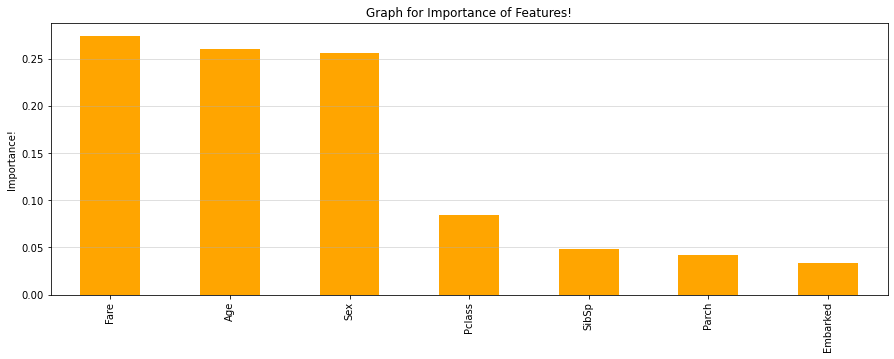

In [34]:
# Checking Feature Importance

Feature_Importance = pd.Series(Model.feature_importances_, index = X.columns)
Feature_Importance.sort_values(ascending = False).plot.bar(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", alpha = 0.5, animated = True)
plt.ylabel("Importance!")
plt.title("Graph for Importance of Features!")
plt.show()

In [35]:
# Extracting the names of the Features in the order of their Importance!
Feature_Names = list(Feature_Importance.sort_values(ascending = False).index)

In [36]:
Feature_Names

['Fare', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

In [42]:
# Building the Model with the Most Important Feature!
Most_Important_Feature = Feature_Names[0]

Model_With_One_Feature = RandomForestClassifier()

# to_frame() -> converts Pandas Series into Pandas Dataframe which will be internally converted into Numpy Array
# when it is passed to fit function for the processing!
Model_With_One_Feature.fit(x_train[Most_Important_Feature].to_frame(), y_train)

y_pred_one_feature = Model_With_One_Feature.predict(x_test[Most_Important_Feature].to_frame())
accuracy_one_feature = accuracy_score(y_test, y_pred_one_feature)

print("Accuracy with the Most Important Feature: ", accuracy_one_feature)

Accuracy with the Most Important Feature:  0.664179104477612


In [ ]:
# Doing the process of Recursive Feature Elimination!

Features_To_Be_Retained = []

# Defining Accuracy Tolerance, if the difference between the Initial & the below calculated Predicitons is more
# than the tolerance, than it will not be removed because it will be an important Feature.
tolerance = 0.02

for feature in x_train.columns:
        model = GradientBoostingClassifier()
        
        # Training the Model each time by removing one feature & all the other features in the previous iterations
        model.fit(x_train.drop([feature] + Features_To_Be_Removed, axis = 1), y_train)
        y_pred = model.predict(x_test.drop([feature] + Features_To_Be_Removed, axis = 1))
        
        accuracy = accuracy_score(y_test, y_pred)
        difference = abs(Initial_Accuracy_Score - accuracy)
        
        if difference > tolerance:
            print("Drop in Accuracy: {}".format(difference))
            print("This is an Important Feature, therefore, not dropping that!")
        else:
            print("Drop in Accuracy: {}".format(difference))
            print("Dropping this Feature, as it is not that much important!")
            Features_To_Be_Removed.append(feature)